## House Price Prediction - Advanced Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

We have to determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import os

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#read the file
house=pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 1: Reading, Understanding and Visualising Data

In [3]:
# Print shape
print(house.shape)

(1460, 81)


In [4]:
#Understand the data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning Begin:

In [7]:
# Identify duplicate rows in dataset based on instant column
print(house.duplicated(subset=None, keep='first').count())
duplicate=house[house.duplicated(['Id'])]
duplicate

#Observed no duplicate rows in bike sharing dataset

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
# Identify how many rows have all missing values
print('Number of empty Rows:')
print(house.isnull().all(axis=1).sum())
# Identified: There are no empty rows in whole dataset.

# Identify how many columns have all missing values
print('Number of empty Columns:')
print(house.isnull().all(axis=0).sum())
# Observed: There are no columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
0


In [9]:
# Identify if there are any columns that have only a single value 
pd.Series({col:house[col].unique() for col in house})

# There are no columns with single value in dataset

Id               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
MSSubClass       [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...
MSZoning                                 [RL, RM, C (all), FV, RH]
LotFrontage      [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
LotArea          [8450, 9600, 11250, 9550, 14260, 14115, 10084,...
Street                                                [Pave, Grvl]
Alley                                            [nan, Grvl, Pave]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn,

In [10]:
#Sum of null value in each column
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
# Columns with decreasing percentage of null values
null = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [12]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [13]:
# We will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'columns as the columns have
# greater than 30% of missing values
# id column is not required for analysis
house = house.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [14]:
null = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [15]:
#Drop the rows having more than 10 missing values
house = house.dropna(thresh=10,how='all',axis=0)
house.shape
#Observation: None of the rows have more than 10 missing values

(1460, 75)

In [16]:
house_unq = house[['LotFrontage','GarageType','Electrical','MasVnrType','MasVnrArea','BsmtFinType1',
                  'BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','GarageCond','GarageQual','GarageFinish',
                   'GarageYrBlt']]

In [17]:
# Unique values in the columns with null values
pd.Series({col:house_unq[col].unique() for col in house_unq})

LotFrontage     [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
GarageType      [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...
Electrical                 [SBrkr, FuseF, FuseA, FuseP, Mix, nan]
MasVnrType                    [BrkFace, None, Stone, BrkCmn, nan]
MasVnrArea      [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...
BsmtFinType1                  [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
BsmtCond                                    [TA, Gd, nan, Fa, Po]
BsmtQual                                    [Gd, TA, Ex, nan, Fa]
BsmtExposure                                [No, Gd, Mn, Av, nan]
BsmtFinType2                  [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
GarageCond                              [TA, Fa, nan, Gd, Po, Ex]
GarageQual                              [TA, Fa, Gd, nan, Ex, Po]
GarageFinish                                 [RFn, Unf, Fin, nan]
GarageYrBlt     [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....
dtype: object

In [18]:
# Data types of the columns with null values
house_unq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   GarageType    1379 non-null   object 
 2   Electrical    1459 non-null   object 
 3   MasVnrType    1452 non-null   object 
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtCond      1423 non-null   object 
 7   BsmtQual      1423 non-null   object 
 8   BsmtExposure  1422 non-null   object 
 9   BsmtFinType2  1422 non-null   object 
 10  GarageCond    1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageFinish  1379 non-null   object 
 13  GarageYrBlt   1379 non-null   float64
dtypes: float64(3), object(11)
memory usage: 108.4+ KB


<AxesSubplot:xlabel='LotFrontage'>

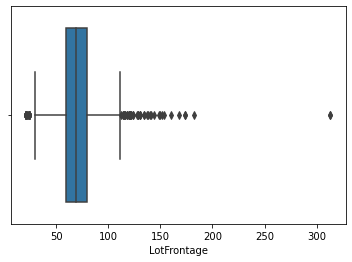

In [19]:
#Box Plot of column LotFrontage to find if any outliers exist.
sns.boxplot(house_unq.LotFrontage)
#Observation:
#LotFrontage has a high number of outliers

<AxesSubplot:xlabel='MasVnrArea'>

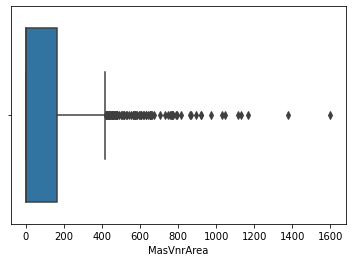

In [20]:
#Box Plot of column MasVnrArea to find if any outliers exist.
sns.boxplot(house_unq.MasVnrArea)
#Observation:
#MasVnrArea has a high number of outliers

<AxesSubplot:xlabel='GarageYrBlt'>

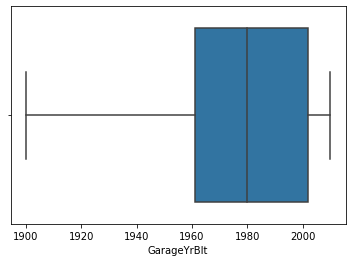

In [21]:
# GarageYrBlt has data type of float. But it is a categorical variable representing year.
sns.boxplot(house_unq.GarageYrBlt)
# Observation:
# We do not see any outliers here as it is a categorical variable

In [22]:
# As "LotFrontage" is Linear feet of street connected to property, 
# it can be imputed with similar 'Neighborhood' values
# For the numerical column MasVnrArea with null values we will use median for imputation.
# For the categorical columns with null values we will use mode for imputation 
# as there are outliers present in the data
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

for col in ('GarageType','Electrical','MasVnrType','BsmtFinType1','BsmtCond','BsmtQual',
            'BsmtExposure','BsmtFinType2','GarageCond','GarageQual','GarageFinish',
            'GarageYrBlt'):
    
    house[col] = house[col].fillna(house[col].mode()[0])


In [23]:
# checking for the presence of any more null values
house.isnull().values.any()

False

In [24]:
# Check the shape
house.shape

(1460, 75)

In [25]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
# Drop columns with more than 80% values as zero
house = house.drop(columns=house.columns[house.eq(0).mean()>0.8])

In [27]:
house.shape

(1460, 67)

In [28]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


##### As the number of data points are small we are not doing any outlier treatment

In [29]:
# We can derive a new column for Age of the Property
# AgeProp - Age of the Property = year sold - year built
house['AgeProp'] = (house['YrSold'] - house['YearBuilt'])
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeProp
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000,8


In [30]:
# As we have determined the age of the property we can drop some of the related columns 
house = house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,AgeProp
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,WD,Normal,250000,8


In [31]:
house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [32]:
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [33]:
# We can drop columns 'Street' and 'Utilities' due to low variance
house = house.drop(['Street'], axis = 1)
house = house.drop(['Utilities'], axis = 1)

In [34]:
# Convert the applicable rows to categorical types

house.OverallQual.replace({1:"Very Poor", 2:"Poor", 3:"Fair", 4:"Below Average",5:"Average", 6:"Above Average", 7:"Good", 8:"Very Good", 9:"Excellent", 10:"Very Excellent"},inplace = True)
house.OverallCond.replace({1:"Very Poor", 2:"Poor", 3:"Fair", 4:"Below Average",5:"Average", 6:"Above Average", 7:"Good", 8:"Very Good", 9:"Excellent", 10:"Very Excellent"},inplace = True)

In [35]:
house.shape

(1460, 62)

In [36]:
# Segregate the data as numeric and store 
data_numeric = house.select_dtypes(exclude='object')
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp
0,60,65.0,8450,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,208500,5
1,20,80.0,9600,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,181500,31
2,60,68.0,11250,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,223500,7
3,70,60.0,9550,0.0,216,540,756,961,756,1717,1,1,0,3,1,7,1,1998.0,3,642,0,35,140000,91
4,60,84.0,14260,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,250000,8


In [37]:
# Segregate the data as categorical and store 
data_categorical = house.select_dtypes(include='object')
data_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [38]:
pd.Series({col:house[col].unique() for col in data_categorical})

MSZoning                                 [RL, RM, C (all), FV, RH]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
OverallQual      [Good, Above Average, Very Good, Average, Exce...
OverallCond      [Average, Very Good, Above Average, Good, Belo...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, WdShngl, Metal, WdShake, Membran, Ta...
Exterior1st      [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace,

### Univariate Analysis:

<AxesSubplot:xlabel='TotRmsAbvGrd'>

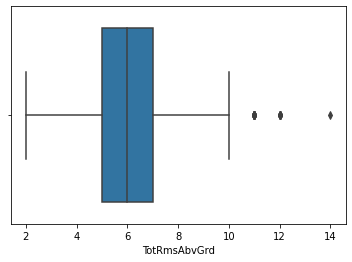

In [39]:
#Univariate analysis using Box Plot on Total rooms above grade
sns.boxplot(house.TotRmsAbvGrd)
#Observations:
#Most of the houses have 6 rooms above grade

<AxesSubplot:xlabel='GarageArea'>

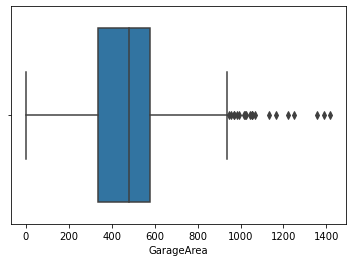

In [40]:
#Univariate analysis using Box Plot on Garage Area
sns.boxplot(house.GarageArea)
#Observations:
#Most of the houses have Garage of approx. 500 sq ft

<AxesSubplot:xlabel='WoodDeckSF'>

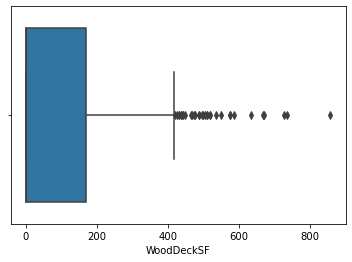

In [41]:
#Univariate analysis using Box Plot on Wooden Deck Area
sns.boxplot(house.WoodDeckSF)
#Observations:
# Most of the houses have Wood deck area between 0 - 200 square feet

Text(0, 0.5, 'Number of Sales')

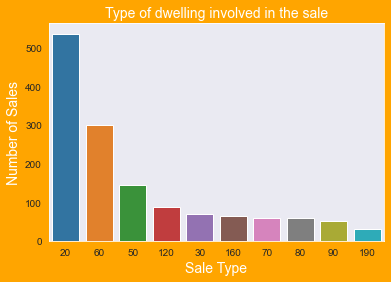

In [42]:
# Univariate analysis using bar plot. Wehave plotted bar plot for top 10 dwelling types
plt.figure(facecolor='orange')
sns.set_style("dark")
ax = sns.countplot(data=house, x="MSSubClass", order=house.MSSubClass.value_counts().iloc[:10].index)
ax.set_title('Type of dwelling involved in the sale',fontsize=14,color='white')
ax.set_xlabel('Sale Type',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# The maximum number of sales are of 1-STORY 1946 & NEWER ALL STYLES

Text(0, 0.5, 'Number of Sales')

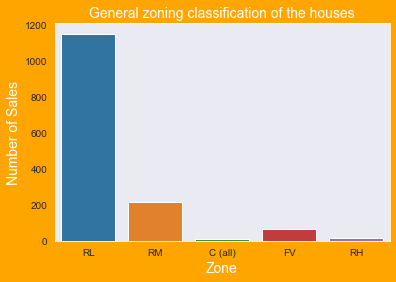

In [43]:
# Univariate analysis using bar plot.We have plotted bar plot for Zone classification of properties.
plt.figure(facecolor='orange')
sns.set_style("dark")
ax = sns.countplot(data=house, x="MSZoning")
ax.set_title('General zoning classification of the houses',fontsize=14,color='white')
ax.set_xlabel('Zone',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the houses are in Residential Low Density (RL) zone

Text(0, 0.5, 'Number of Sales')

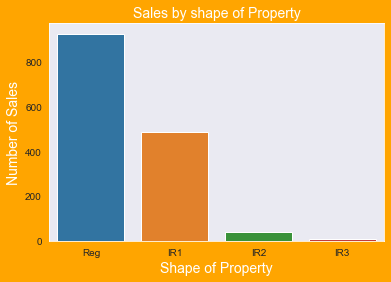

In [44]:
# Univariate analysis using bar plot. Wehave plotted bar plot for shape of the property
plt.figure(facecolor='orange')
sns.set_style("dark")
ax = sns.countplot(data=house, x="LotShape", order=house.LotShape.value_counts().iloc[:10].index)
ax.set_title('Sales by shape of Property',fontsize=14,color='white')
ax.set_xlabel('Shape of Property',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the sales has been on the properties with regular shape.

Text(0, 0.5, 'Number of Sales')

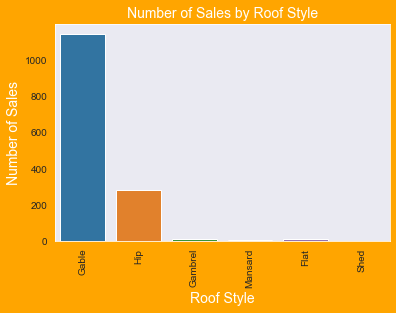

In [45]:
# Univariate analysis using bar plot. We have plotted bar plot for Roof Style.
plt.figure(facecolor='orange')
plt.xticks(rotation=90)
sns.set_style("dark")
ax = sns.countplot(data=house, x="RoofStyle")
ax.set_title('Number of Sales by Roof Style',fontsize=14,color='white')
ax.set_xlabel('Roof Style',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the sales happened on properties with Gable roofs

Text(0, 0.5, 'Number of Sales')

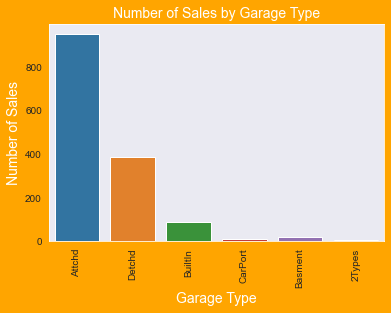

In [46]:
# Univariate analysis using bar plot. Wehave plotted bar plot for Garage Type
plt.figure(facecolor='orange')
plt.xticks(rotation=90)
sns.set_style("dark")
ax = sns.countplot(data=house, x="GarageType")
ax.set_title('Number of Sales by Garage Type',fontsize=14,color='white')
ax.set_xlabel('Garage Type',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the properties sold had Garage attached to the house.

Text(0, 0.5, 'Number of Sales')

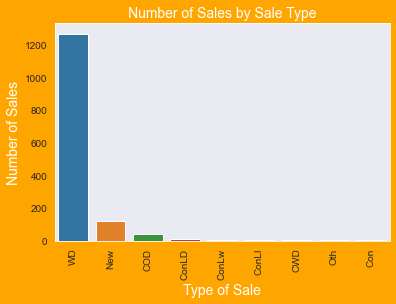

In [47]:
# Univariate analysis using bar plot. Wehave plotted bar plot for Type of Sale
plt.figure(facecolor='orange')
plt.xticks(rotation=90)
sns.set_style("dark")
ax = sns.countplot(data=house, x="SaleType", order=house.SaleType.value_counts().iloc[:10].index)
ax.set_title('Number of Sales by Sale Type',fontsize=14,color='white')
ax.set_xlabel('Type of Sale',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the sales happen through Conventional Warranty Deed

Text(0, 0.5, 'Number of Sales')

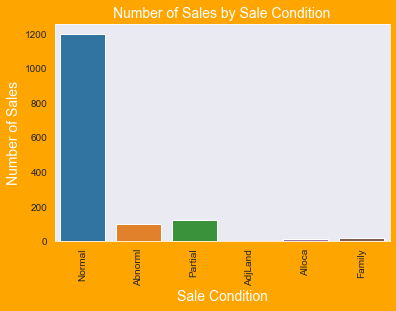

In [48]:
# Univariate analysis using bar plot. We have plotted bar plot for Sale Condition
plt.figure(facecolor='orange')
plt.xticks(rotation=90)
sns.set_style("dark")
ax = sns.countplot(data=house, x="SaleCondition")
ax.set_title('Number of Sales by Sale Condition',fontsize=14,color='white')
ax.set_xlabel('Sale Condition',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
#Observations:
# Most of the property sales have been normal sale

Text(0, 0.5, 'Number of Sales')

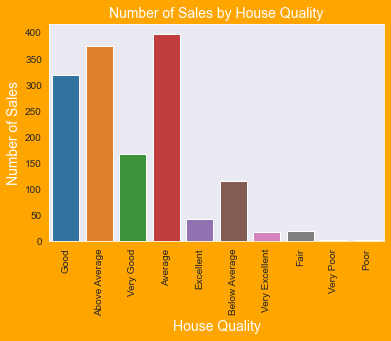

In [49]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(facecolor='orange')
plt.xticks(rotation=90)
ax = sns.countplot(data=house, x="OverallQual")
ax.set_title('Number of Sales by House Quality',fontsize=14,color='white')
ax.set_xlabel('House Quality',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
# Observation:
# The highest number of sales has happened where the overall quality is Average or above average

Text(0, 0.5, 'Number of Sales')

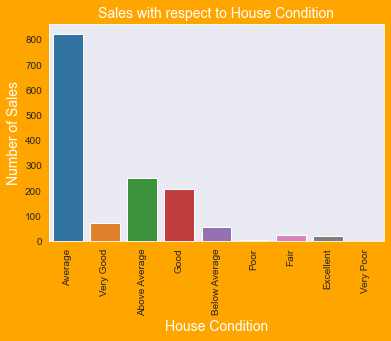

In [50]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(facecolor='orange')
plt.xticks(rotation=90)
ax = sns.countplot(data=house, x="OverallCond")
ax.set_title('Sales with respect to House Condition',fontsize=14,color='white')
ax.set_xlabel('House Condition',fontsize=14,color='w')
ax.set_ylabel('Number of Sales',fontsize=14,color='w')
# Observation:
# # The maximum number of sales has happened where the house condition is Average

### Bivariate Analysis:

### Categorical vs Continuous

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

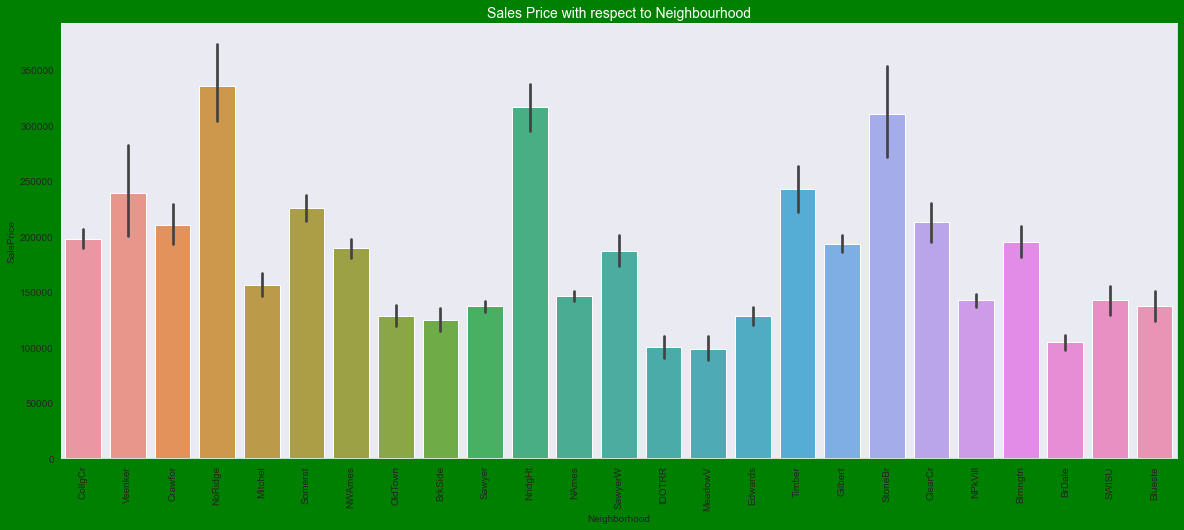

In [51]:
# plot 'Sale Price' with respect to 'Neighborhood'
plt.figure(figsize=(20, 8),facecolor='green')
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood",fontsize=14,color='w')
plt.xticks(rotation=90)
# Observation
# NoRidge has the highest number of properties sold

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Inside'),
  Text(1, 0, 'FR2'),
  Text(2, 0, 'Corner'),
  Text(3, 0, 'CulDSac'),
  Text(4, 0, 'FR3')])

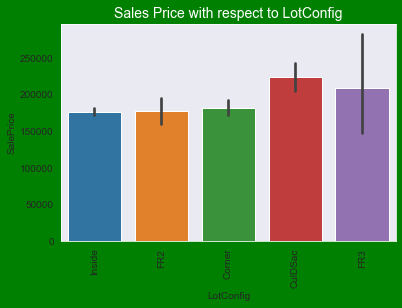

In [52]:
# plot 'Sale Price' with respect to 'LotConfig'
plt.figure(facecolor='green')
sns.barplot(x="LotConfig", y="SalePrice", data= house)
plt.title("Sales Price with respect to LotConfig",fontsize=14,color='w')
plt.xticks(rotation=90)
# Observation
# Cul-de-sac properties are the costliest

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PConc'),
  Text(1, 0, 'CBlock'),
  Text(2, 0, 'BrkTil'),
  Text(3, 0, 'Wood'),
  Text(4, 0, 'Slab'),
  Text(5, 0, 'Stone')])

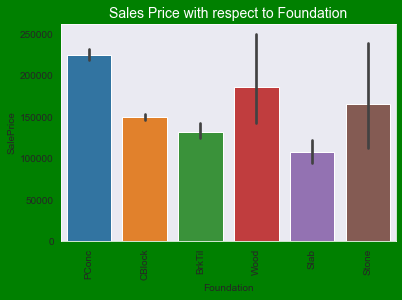

In [53]:
# plot 'Sale Price' with respect to 'Foundation'
plt.figure(facecolor='green')
sns.barplot(x="Foundation", y="SalePrice", data= house)
plt.title("Sales Price with respect to Foundation",fontsize=14,color='w')
plt.xticks(rotation=90)
# Observation
# House with Poured Concrete Foundation is the costliest

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'GasA'),
  Text(1, 0, 'GasW'),
  Text(2, 0, 'Grav'),
  Text(3, 0, 'Wall'),
  Text(4, 0, 'OthW'),
  Text(5, 0, 'Floor')])

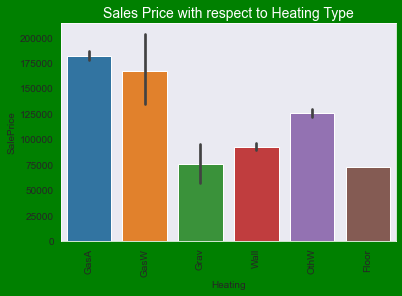

In [54]:
# plot 'Sale Price' with respect to 'Heating'
plt.figure(facecolor='green')
sns.barplot(x="Heating", y="SalePrice", data= house)
plt.title("Sales Price with respect to Heating Type",fontsize=14,color='w')
plt.xticks(rotation=90)
# Observation
# House with Gas forced warm air furnace type heating is the costliest

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SBrkr'),
  Text(1, 0, 'FuseF'),
  Text(2, 0, 'FuseA'),
  Text(3, 0, 'FuseP'),
  Text(4, 0, 'Mix')])

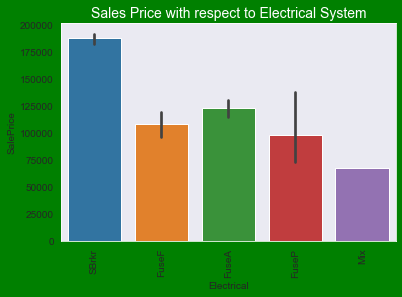

In [55]:
# plot 'Sale Price' with respect to 'Neighborhood'
plt.figure(facecolor='green')
sns.barplot(x="Electrical", y="SalePrice", data= house)
plt.title("Sales Price with respect to Electrical System",fontsize=14,color='w')
plt.xticks(rotation=90)
# Observation
# House with Standard Circuit Breakers & Romex is costliest

<Figure size 432x288 with 0 Axes>

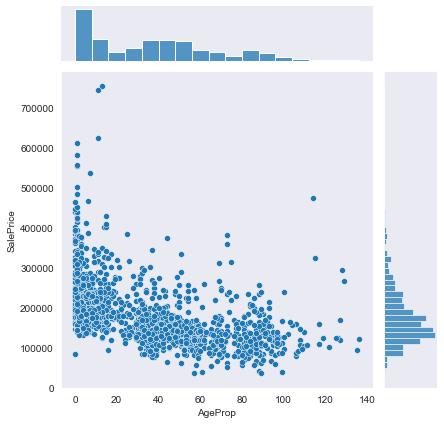

In [56]:
# plot 'Sale Price' with respect to 'Property Age'
plt.figure(facecolor='green')
sns.jointplot(x = house['AgeProp'], y = house['SalePrice'])
plt.show()
# Observation
# The sale price of property shows a slightly negative trend with age of the property

### Continuous vs Continuous

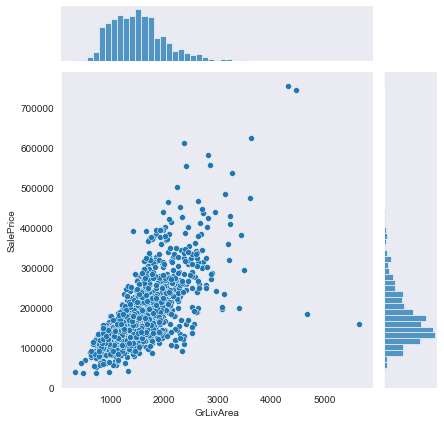

In [57]:
# Plot GrLivArea vs SalePrice
sns.jointplot(x = house['GrLivArea'], y = house['SalePrice'])
plt.show()
# Observation:
# The graph shows the houses having above grade living area has positive linear relation with Sales Price

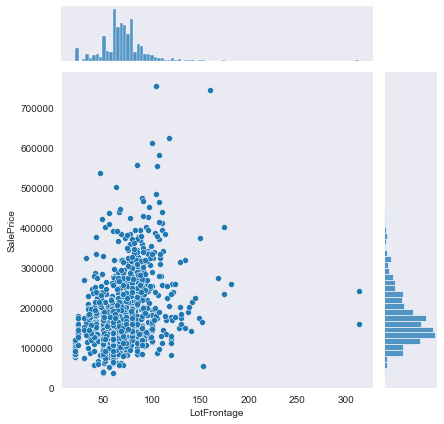

In [58]:
# Lot frontage vs SalePrice 
sns.jointplot(x = house['LotFrontage'], y = house['SalePrice'])
plt.show()
# Observation:
# The graph shows weak positive relationship between Lot Frontage and Sales Price

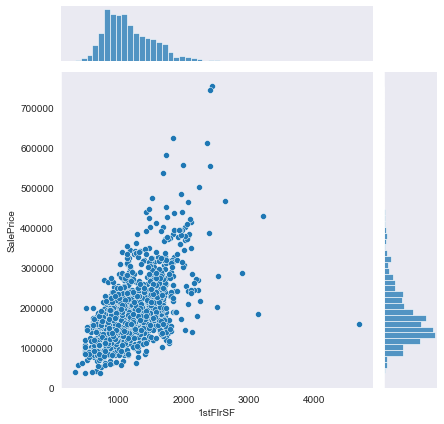

In [59]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = house['1stFlrSF'], y = house['SalePrice'])
plt.show()
# Observation:
# The graph shows the first floor area has positive linear relation with Sales Price

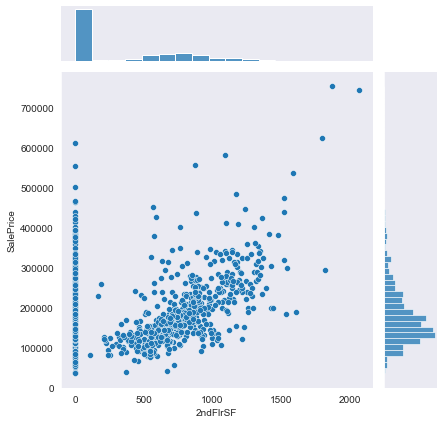

In [60]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = house['2ndFlrSF'], y = house['SalePrice'])
plt.show()
# Observation:
# The graph shows the second floor area has positive linear relation with Sales Price

### Multivariate Analysis:

In [61]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp
MSSubClass,1.000000,-0.370367,-0.139781,0.023573,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.098664,-0.040110,-0.098672,-0.012579,-0.006100,-0.084284,-0.028746
LotFrontage,-0.370367,1.000000,0.335957,0.195830,0.232576,0.119174,0.381038,0.434109,0.075686,0.385190,0.107226,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.036975,0.281393,0.339085,0.088736,0.141734,0.349876,-0.120601
LotArea,-0.139781,0.335957,1.000000,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.042198,0.154871,0.180403,0.171698,0.084774,0.263843,-0.014832
MasVnrArea,0.023573,0.195830,0.103321,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.209289,0.361945,0.370884,0.159991,0.122528,0.472614,-0.311479
BsmtFinSF1,-0.069836,0.232576,0.214103,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.119267,0.224054,0.296970,0.204306,0.111761,0.386420,-0.248483
BsmtUnfSF,-0.140759,0.119174,-0.002618,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.172350,0.214175,0.183303,-0.005316,0.129005,0.214479,-0.150619
TotalBsmtSF,-0.238518,0.381038,0.260833,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.262945,0.434585,0.486665,0.232019,0.247264,0.613581,-0.391498
1stFlrSF,-0.251758,0.434109,0.299475,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.182240,0.439317,0.489782,0.235459,0.211671,0.605852,-0.282143
2ndFlrSF,0.307886,0.075686,0.050986,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.052291,0.183926,0.138347,0.092165,0.208026,0.319334,-0.011552
GrLivArea,0.074853,0.385190,0.263116,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.178186,0.467247,0.468997,0.247433,0.330224,0.708624,-0.200302


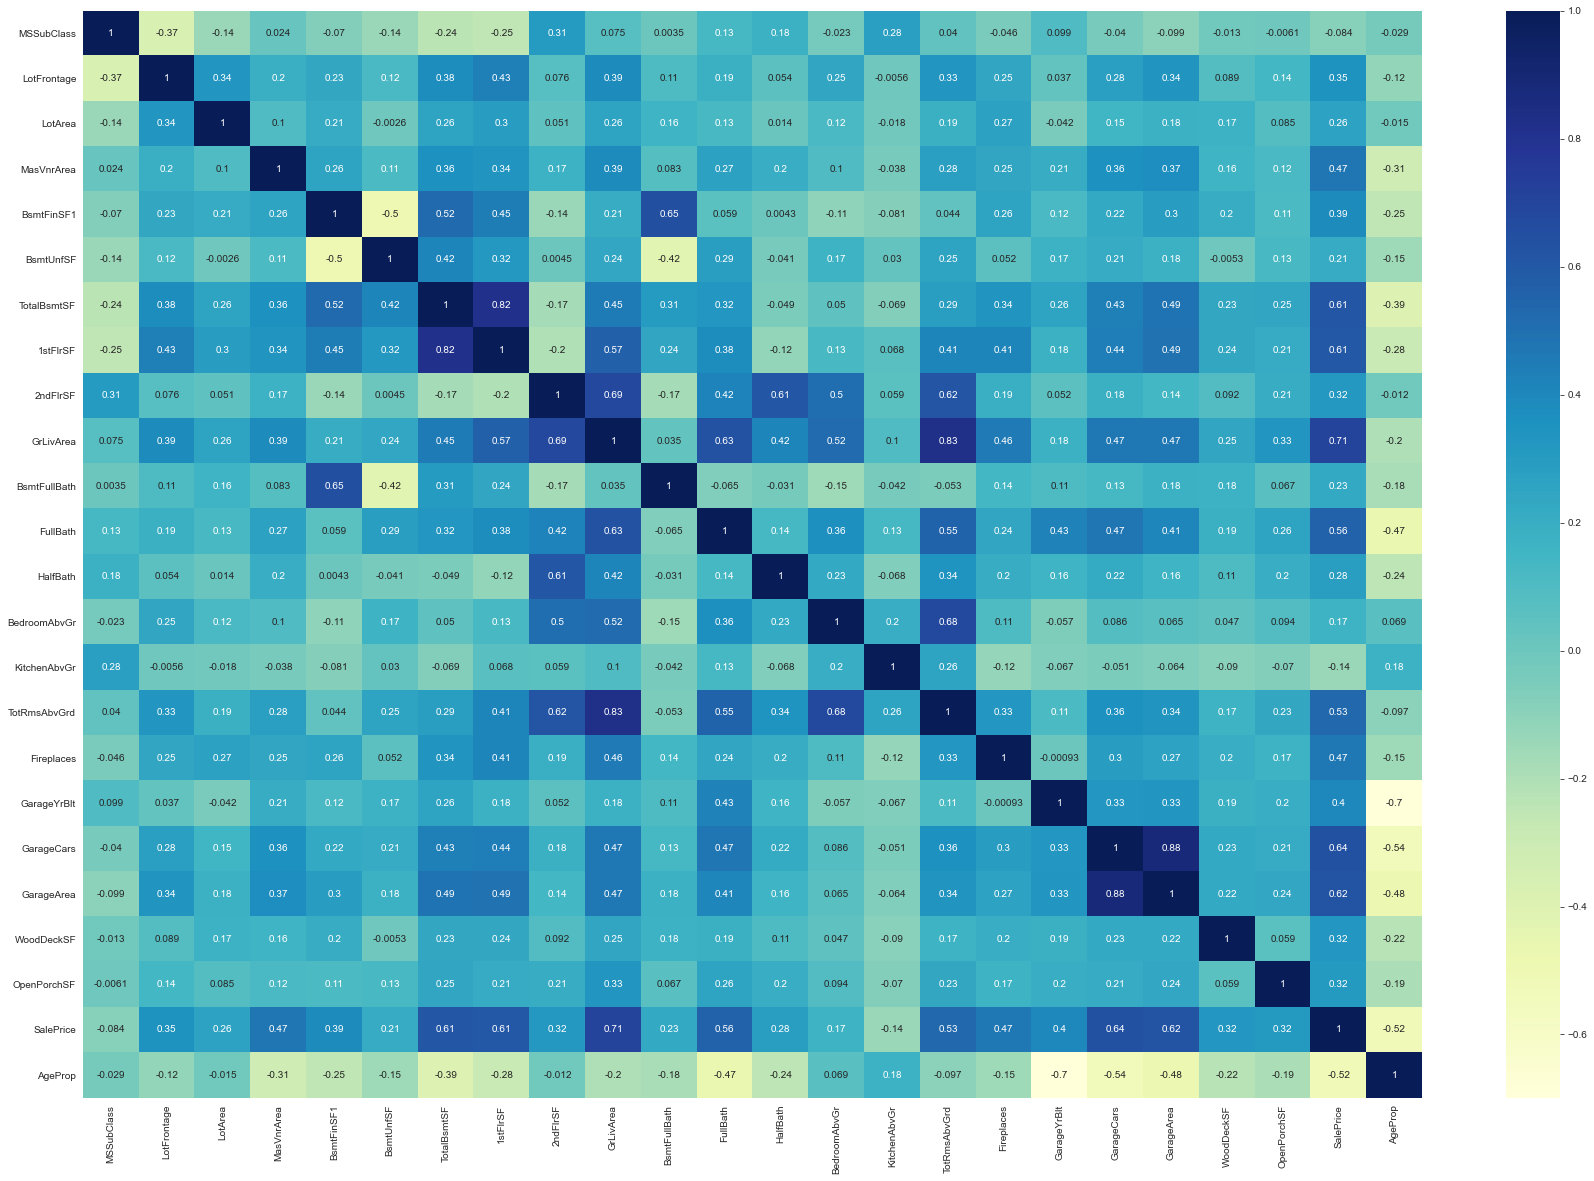

In [62]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Step 2: Preparing the Data for modelling

### Dummy Variables

In [63]:
#data_categorical.drop("CentralAir")
house=pd.get_dummies(data=house,columns=data_categorical.columns,drop_first=True)
house.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,208500,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0

In [64]:
house.shape

(1460, 235)

### Data Splitting

Here, we will split the data into 2 parts
1. Train Data (On which model will be build and is almost 80% of total data)
2. Test Data (On which build model will be tested and is almost 20% of total data)

In [65]:
df_train, df_test = train_test_split(house, train_size=0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1168, 235)
(292, 235)


### Rescaling the Numeric Data

In [66]:
# Rescaling should be done only on the numerical variables and not on the categorical types
scaler = MinMaxScaler()
df_train[data_numeric.columns] = scaler.fit_transform(df_train[data_numeric.columns])
df_test[data_numeric.columns] = scaler.transform(df_test[data_numeric.columns])
df_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
133,0.000000,0.219178,0.025955,0.08500,0.178065,0.112158,0.207365,0.213889,0.00000,0.164873,0.333333,0.666667,0.0,0.250,0.0,0.272727,0.00000

In [67]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,11

In [68]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,AgeProp,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,29

## Step 3: Training the Model

In [69]:
#Build a model with all variables
y_train = df_train.pop('SalePrice')
X_train = df_train
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     72.24
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:26:46   Log-Likelihood:                 2619.9
No. Observations:                1168   AIC:                            -4786.
Df Residuals:                     941   BIC:                            -3636.
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.0848      0.090    -12.056      0.000      -1.261      -0.908
MSSubClass                    -0.0084      0.018     -0.455      0.650      -0.045       0.028
LotFrontage                    0.0251      0.019      1.308      0.191      -0.013       0.063
LotArea                        0.1816      0.033      5.538      0.000       0.117       0.246
MasVnrArea                     0.0373      0.013      2.958      0.003       0.013       0.062
BsmtFinSF1                     0.0439      0.061      0.721      0.471      -0.076       0.163
BsmtUnfSF                     -0.0504      0.025     -1.982      0.048      -0.100      -0.000
TotalBsmtSF                    0.2727      0.072      3.805      0.000       0.132       0.413
1stFlrSF                       0.2736      0.114      2.403      0.016       0.050       0.497
2ndFlrSF                       0.1803      0.052      3.447      0.001       0.078       0.283
GrLivArea                      0.1233      0.134      0.919      0.358      -0.140       0.387
BsmtFullBath                   0.0066      0.008      0.840      0.401      -0.009       0.022
FullBath                       0.0114      0.009      1.197      0.232      -0.007       0.030
HalfBath                      -0.0009      0.006     -0.140      0.889      -0.013       0.011
BedroomAbvGr                  -0.0360      0.016     -2.287      0.022      -0.067      -0.005
KitchenAbvGr                  -0.0369      0.016     -2.333      0.020      -0.068      -0.006
TotRmsAbvGrd                   0.0023      0.015      0.153      0.878      -0.027       0.031
Fireplaces                     0.0099      0.006      1.709      0.088      -0.001       0.021
GarageYrBlt                    0.0081      0.007      1.087      0.277      -0.007       0.023
GarageCars                     0.0151      0.013      1.170      0.242      -0.010       0.040
GarageArea                     0.0175      0.016      1.100      0.271      -0.014       0.049
WoodDeckSF                    -0.0009      0.007     -0.132      0.895      -0.015       0.013
OpenPorchSF                    0.0146      0.009      1.651      0.099      -0.003       0.032
AgeProp                       -0.0833      0.015     -5.743      0.000      -0.112      -0.055
MSZoning_FV                    0.0567      0.017      3.241      0.001       0.022       0.091
MSZoning_RH                    0.0493      0.018      2.788      0.005       0.015       0.084
MSZoning_RL                    0.0461      0.015      3.018      0.003       0.016       0.076
MSZoning_RM                    0.0411      0.014      2.848      0.004       0.013       0.069
LotShape_IR2                   0.0028      0.006      0.474      0.636      -0.009       0.014
LotShape_IR3                   0.0116      

In [70]:
# Find the VIF values of all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
233,SaleCondition_Partial,inf
214,GarageQual_TA,inf
105,OverallCond_Very Poor,inf
118,Exterior1st_AsphShn,inf
121,Exterior1st_CBlock,inf
132,Exterior2nd_AsphShn,inf
135,Exterior2nd_CBlock,inf
166,BsmtCond_Po,inf
193,Electrical_Mix,inf
211,GarageQual_Fa,inf


Now from the p-values and VIF above it is very difficult to drop the columns one by one and reach at a optimal model. So we will use RFE method for model building.

### RFE

In [71]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [72]:
# Provide ranking to the features of the model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 130),
 ('LotFrontage', False, 71),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 62),
 ('BsmtFinSF1', False, 108),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 39),
 ('BsmtFullBath', False, 131),
 ('FullBath', False, 60),
 ('HalfBath', False, 172),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 192),
 ('Fireplaces', False, 128),
 ('GarageYrBlt', False, 114),
 ('GarageCars', False, 87),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 199),
 ('OpenPorchSF', False, 77),
 ('AgeProp', True, 1),
 ('MSZoning_FV', False, 10),
 ('MSZoning_RH', False, 9),
 ('MSZoning_RL', False, 11),
 ('MSZoning_RM', False, 12),
 ('LotShape_IR2', False, 208),
 ('LotShape_IR3', False, 138),
 ('LotShape_Reg', False, 180),
 ('LandContour_HLS', False, 183),
 ('LandContour_Low', False, 194),
 ('LandContour_Lvl', False, 118),
 ('LotConfig_CulDSac', False, 72),
 ('LotConfig_FR2', False

In [73]:
# Select only the columns which will be used for building the model and store it in col variable
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'AgeProp', 'LandSlope_Sev', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'OverallQual_Excellent', 'OverallQual_Very Excellent', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Foundation_Wood', 'Electrical_Mix', 'Functional_Sev'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [74]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [75]:
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [76]:
# Running the linear model
lm_1 = sm.OLS(y_train, X_train_rfe_sm).fit()

In [77]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     294.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:27:17   Log-Likelihood:                 2093.2
No. Observations:                1168   AIC:                            -4134.
Df Residuals:                    1142   BIC:                            -4003.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [78]:
# Find the VIF values of all the features in X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#VIF value is in higher range for the features 'RoofMatl_CompShg', 'TotalBsmtSF', 'BedroomAbvGr',
#'1stFlrSF' and 'GarageArea'. 
#However the p-values is in acceptable range for all the features. 

,Features,VIF
15,RoofMatl_CompShg,27.84
1,TotalBsmtSF,23.25
4,BedroomAbvGr,22.12
2,1stFlrSF,20.99
6,GarageArea,10.57
7,AgeProp,3.57
0,LotArea,3.27
14,RoofStyle_Shed,3.06
3,2ndFlrSF,3.01
11,Condition2_RRAe,2.56


We could have dropped VIF values further and derived a optimum model. However the R-square value would have reduced. We can revisit this if the R-square value obtained from Lasso and Ridge is lower than that obtained from RFE.

## Step 4: Residual Analysis of the Train Data

In [79]:
y_train_pred = lm_1.predict()

In [80]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8657105910566493

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

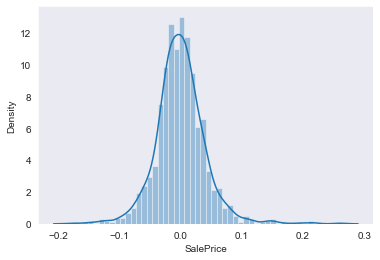

In [81]:
#Plot the residual graph to understand the distribution of error between y_train and y_train_pred
res = y_train - y_train_pred
sns.distplot(res)

# From the below plot we can see that the errors are normally distributed around zero. 
# So our assumption of using linear regression model holds good.

## Step 5: Prediction and Analysis on Test Data

In [82]:
# Divide the dataset to X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [83]:
X_test_new = X_test[col]

In [84]:
# Add a constant to the dataset
X_test_new = sm.add_constant(X_test_new)

In [85]:
# Predict
y_test_pred = lm_1.predict(X_test_new)

In [86]:
# Evaluate the model
r2_score(y_true = y_test,y_pred=y_test_pred)

# As the variation of r2 between train and test set is more than 5% we can assume that the model is 
# not reliable

0.7473505723241496

Text(0, 0.5, 'y_pred')

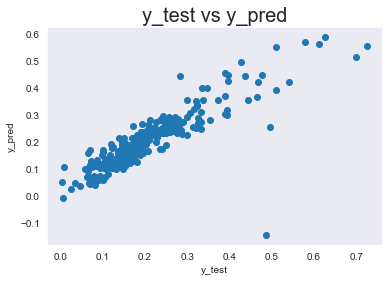

In [87]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')

<AxesSubplot:ylabel='Density'>

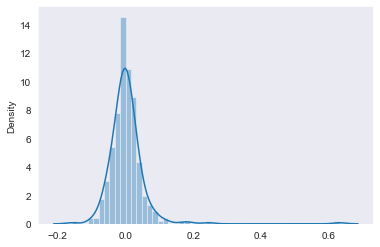

In [88]:
res = y_test - y_test_pred
sns.distplot(res)

In [89]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8657105910566493
0.7473505723241539
1.898303912293873
0.9146713277355083
0.0016252601988817406
0.003132436053888727


We can clearly see that there is a high difference between R value of train and test data

### Ridge and Lasso Regression

### Lasso

In [90]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
# cv_results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1]
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.090805,3.118776e-02,0.0044,0.002245,0.0001,{'alpha': 0.0001},-0.025350,-0.022931,-0.024650,-0.024602,-0.024467,-0.024400,0.000796,1,-0.020541,-0.021280,-0.018410,-0.020988,-0.021127,-0.020469,0.001059
1,0.019001,1.168008e-07,0.0052,0.000400,0.001,{'alpha': 0.001},-0.028158,-0.028536,-0.031034,-0.028025,-0.031191,-0.029389,0.001418,2,-0.027098,-0.027697,-0.026317,-0.027253,-0.027821,-0.027238,0.000533
2,0.016401,4.898040e-04,0.0048,0.001470,0.01,{'alpha': 0.01},-0.050658,-0.056963,-0.057256,-0.052298,-0.060658,-0.055567,0.003620,3,-0.056554,-0.054158,-0.054563,-0.055443,-0.054551,-0.055054,0.000860
3,0.015800,4.996035e-03,0.0042,0.002136,0.05,{'alpha': 0.05},-0.079527,-0.082130,-0.080802,-0.077632,-0.080287,-0.080076,0.001488,4,-0.080625,-0.079005,-0.079724,-0.079726,-0.080289,-0.079874,0.000554
4,0.014201,3.999949e-04,0.0056,0.001200,0.1,{'alpha': 0.1},-0.079527,-0.082130,-0.080802,-0.077632,-0.080287,-0.080076,0.001488,4,-0.080625,-0.079005,-0.079724,-0.079726,-0.080289,-0.079874,0.000554


In [92]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.02440006937764811


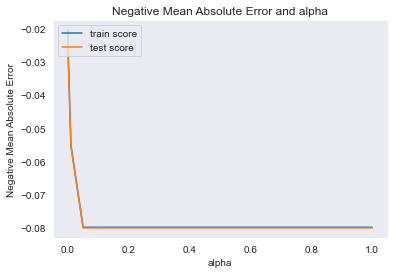

In [93]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the formula we can see best alpha value = 0.0001. However from the graph we can see the value to be approximately 0.01 after which the values gets normalised. So we will go ahead with alpha = 0.0001 as per the formula

In [94]:
# At alpha = 0.0001, even the smallest of negative coefficients that have some predictive power 
# towards 'SalePrice' have been generated

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-3.04724930e-02, -9.58365392e-03,  3.31151815e-02,  2.94609327e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.37708525e-02,  3.23747346e-01,  2.97711083e-02,  2.83228333e-02,
        5.47850766e-03, -0.00000000e+00, -2.29090915e-02,  1.02008688e-02,
        2.17499218e-02,  0.00000000e+00,  5.16057735e-02,  0.00000000e+00,
        1.67462858e-03,  0.00000000e+00, -3.24401438e-02,  8.72446849e-03,
        0.00000000e+00,  3.99199665e-03, -0.00000000e+00,  3.62018539e-03,
       -1.73644877e-02, -1.01870376e-03,  6.87162768e-03,  1.59669980e-02,
        1.61313582e-02,  1.38388931e-02, -1.07273087e-02, -0.00000000e+00,
       -8.87963269e-04,  4.03962779e-03,  2.52126341e-03, -0.00000000e+00,
        0.00000000e+00,  4.66774139e-04,  9.22653082e-03, -0.00000000e+00,
        3.49710174e-02, -1.94823979e-02, -2.77694471e-03, -9.88760873e-03,
       -1.39003589e-02, -1.02653762e-02, -6.33667547e-03,  0.00000000e+00,
       -8.95134653e-04,  

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.903217155765661
0.8742658054157848
1.3681142340158563
0.45519779625091034
0.001171330679808096
0.0015588965625031176


In [96]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.049),
 ('MSSubClass', -0.03),
 ('LotFrontage', -0.01),
 ('LotArea', 0.033),
 ('MasVnrArea', 0.029),
 ('BsmtFinSF1', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.034),
 ('GrLivArea', 0.324),
 ('BsmtFullBath', 0.03),
 ('FullBath', 0.028),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.023),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', 0.022),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.052),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.002),
 ('OpenPorchSF', 0.0),
 ('AgeProp', -0.032),
 ('MSZoning_FV', 0.009),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.004),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', -0.017),
 ('LotShape_Reg', -0.001),
 ('LandContour_HLS', 0.007),
 ('LandContour_Low', 0.016),
 ('LandContour_Lvl', 0.016),
 ('LotConfig_CulDSac', 0.014),
 ('LotConfig_FR2', -0.011),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.001),
 ('LandSlope_Mod', 0.004),
 ('LandSlope_Sev', 0.003),
 ('Neighbor

In [97]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.05596817000660984


The R2 values for Train and Test matches well, indicating an optimum model

In [98]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [99]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,0.049
1,MSSubClass,-0.030
2,LotFrontage,-0.010
3,LotArea,0.033
4,MasVnrArea,0.029


In [100]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
10,GrLivArea,0.324
96,OverallQual_Very Excellent,0.116
92,OverallQual_Excellent,0.094
118,RoofMatl_WdShngl,0.093
54,Neighborhood_NoRidge,0.054
19,GarageCars,0.052
0,constant,0.049
97,OverallQual_Very Good,0.037
45,Neighborhood_Crawfor,0.035
9,2ndFlrSF,0.034


In [101]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
10,GrLivArea,0.324
96,OverallQual_Very Excellent,0.116
92,OverallQual_Excellent,0.094
118,RoofMatl_WdShngl,0.093
54,Neighborhood_NoRidge,0.054
19,GarageCars,0.052
0,constant,0.049
97,OverallQual_Very Good,0.037
45,Neighborhood_Crawfor,0.035
9,2ndFlrSF,0.034


In [102]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
10,GrLivArea,0.324
96,OverallQual_Very Excellent,0.116
92,OverallQual_Excellent,0.094
118,RoofMatl_WdShngl,0.093
54,Neighborhood_NoRidge,0.054
19,GarageCars,0.052
0,constant,0.049
97,OverallQual_Very Good,0.037
45,Neighborhood_Crawfor,0.035
9,2ndFlrSF,0.034


In [103]:
pred.shape

(125, 2)

### Ridge Regression

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 7.0}
-0.025668060297520223


In [106]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=5]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043001,2.699684e-02,0.0086,0.001743,0.0001,{'alpha': 0.0001},-0.025074,-0.027645,-0.029949,-0.032010,-0.022946,-0.027525,0.003255,24,-0.016065,-0.016849,-0.016852,-0.017519,-0.016996,-0.016856,0.000466
1,0.023400,3.878153e-03,0.0090,0.001265,0.001,{'alpha': 0.001},-0.025034,-0.027513,-0.029946,-0.031873,-0.022924,-0.027458,0.003229,23,-0.016061,-0.016836,-0.016850,-0.017508,-0.016999,-0.016851,0.000464
2,0.018800,2.399826e-03,0.0096,0.005713,0.01,{'alpha': 0.01},-0.024743,-0.026535,-0.029910,-0.030781,-0.022901,-0.026974,0.002996,22,-0.016172,-0.016807,-0.016841,-0.017496,-0.017099,-0.016883,0.000432
3,0.020000,1.168008e-07,0.0020,0.004000,0.05,{'alpha': 0.05},-0.025095,-0.025271,-0.029755,-0.029019,-0.024018,-0.026632,0.002302,15,-0.017171,-0.017563,-0.016835,-0.018018,-0.017980,-0.017513,0.000459
4,0.016000,4.899014e-03,0.0080,0.004000,0.1,{'alpha': 0.1},-0.025867,-0.025010,-0.029581,-0.028389,-0.025042,-0.026778,0.001867,18,-0.017972,-0.018369,-0.016853,-0.018656,-0.018730,-0.018116,0.000685


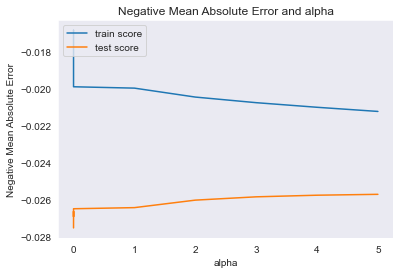

In [107]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [108]:
# As from the graph the value seems to be constant after 2. However we will consider alpha = 7 as per formula
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02259518, -0.00589615,  0.02098748,  0.03281013,  0.01770335,
        0.0130152 ,  0.02563781,  0.05280276,  0.06664589,  0.06952237,
        0.02622043,  0.04372643,  0.01646051,  0.00540674, -0.01485361,
        0.0476194 ,  0.03020824,  0.00082444,  0.0389706 ,  0.0230768 ,
        0.0129885 ,  0.00350631, -0.01424598,  0.01399456,  0.00859167,
        0.00831916,  0.00293477,  0.00567235, -0.011778  , -0.00164207,
        0.01244518,  0.01435187,  0.01875786,  0.01316439, -0.01731399,
       -0.00870618, -0.00311745,  0.00984015,  0.00690954, -0.00420941,
       -0.00245926, -0.00119128,  0.00287212, -0.0070463 ,  0.02848426,
       -0.02630467, -0.01343591, -0.01551001, -0.01467579, -0.01699583,
       -0.01380908,  0.00076595, -0.00758291,  0.05499799,  0.0320177 ,
       -0.01289626, -0.00043788, -0.01080296, -0.0007222 ,  0.00946985,
        0.03086927, -0.00491151,  0.01157376, -0.0078238 ,  0.01376877,
        0.00743527, -0.0072517 , -0.00863245,  0.01043002, -0.00

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8894024182394125
0.8867181891752856
1.5633982143366965
0.41011620437258606
0.0013385258684389524
0.0014045075492211852


In [110]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.05596817000660984


In [111]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.08),
 ('MSSubClass', -0.023),
 ('LotFrontage', -0.006),
 ('LotArea', 0.021),
 ('MasVnrArea', 0.033),
 ('BsmtFinSF1', 0.018),
 ('BsmtUnfSF', 0.013),
 ('TotalBsmtSF', 0.026),
 ('1stFlrSF', 0.053),
 ('2ndFlrSF', 0.067),
 ('GrLivArea', 0.07),
 ('BsmtFullBath', 0.026),
 ('FullBath', 0.044),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.005),
 ('KitchenAbvGr', -0.015),
 ('TotRmsAbvGrd', 0.048),
 ('Fireplaces', 0.03),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.039),
 ('GarageArea', 0.023),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.004),
 ('AgeProp', -0.014),
 ('MSZoning_FV', 0.014),
 ('MSZoning_RH', 0.009),
 ('MSZoning_RL', 0.008),
 ('MSZoning_RM', 0.003),
 ('LotShape_IR2', 0.006),
 ('LotShape_IR3', -0.012),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', 0.014),
 ('LandContour_Lvl', 0.019),
 ('LotConfig_CulDSac', 0.013),
 ('LotConfig_FR2', -0.017),
 ('LotConfig_FR3', -0.009),
 ('LotConfig_Inside', -0.003),
 ('LandSlope_Mod', 0.01),
 ('LandSlope_Sev',

In [112]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [113]:
paraR = pd.DataFrame(mod_ridge)
paraR.columns = ['Variable', 'Coeff']
res=paraR.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,0.080
10,GrLivArea,0.070
9,2ndFlrSF,0.067
96,OverallQual_Very Excellent,0.065
92,OverallQual_Excellent,0.063
54,Neighborhood_NoRidge,0.055
8,1stFlrSF,0.053
118,RoofMatl_WdShngl,0.048
16,TotRmsAbvGrd,0.048
12,FullBath,0.044


In [114]:
# Sorting the coefficients in ascending order
paraR = paraR.sort_values((['Coeff']), axis = 0, ascending = False)
paraR

,Variable,Coeff
0,constant,0.080
10,GrLivArea,0.070
9,2ndFlrSF,0.067
96,OverallQual_Very Excellent,0.065
92,OverallQual_Excellent,0.063
54,Neighborhood_NoRidge,0.055
8,1stFlrSF,0.053
118,RoofMatl_WdShngl,0.048
16,TotRmsAbvGrd,0.048
12,FullBath,0.044


In [115]:
## since there were few coefficients at 0, we removed them from features
predR = pd.DataFrame(paraR[(paraR['Coeff'] != 0)])
paraR

,Variable,Coeff
0,constant,0.080
10,GrLivArea,0.070
9,2ndFlrSF,0.067
96,OverallQual_Very Excellent,0.065
92,OverallQual_Excellent,0.063
54,Neighborhood_NoRidge,0.055
8,1stFlrSF,0.053
118,RoofMatl_WdShngl,0.048
16,TotRmsAbvGrd,0.048
12,FullBath,0.044


In [116]:
predR.shape

(220, 2)

In [117]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.865711,0.889402,0.903217
1,R2 Score (Test),0.747351,0.886718,0.874266
2,RSS (Train),1.898304,1.563398,1.368114
3,RSS (Test),0.914671,0.410116,0.455198
4,MSE (Train),0.040315,0.036586,0.034225
5,MSE (Test),0.055968,0.037477,0.039483


From the above table we can conclude that among all the Regression models Ridge does better as:
1. The R-square value of Test data is higher in Ridge
2. The error values are lower in test data of Ridge

### Changes in the coefficients after regularization

In [118]:
betas = pd.DataFrame(index=X_train.columns)

In [119]:
betas.rows = X_train.columns

In [120]:
betas.rows

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=234)

In [121]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [122]:
pd.set_option('display.max_rows', None)
betas.head(39)

,Linear,Ridge,Lasso
MSSubClass,-0.008437,-0.022595,-0.030472
LotFrontage,0.025112,-0.005896,-0.009584
LotArea,0.181563,0.020987,0.033115
MasVnrArea,0.037296,0.032810,0.029461
BsmtFinSF1,0.043896,0.017703,0.000000
BsmtUnfSF,-0.050375,0.013015,0.000000
TotalBsmtSF,0.272691,0.025638,0.000000
1stFlrSF,0.273191,0.052803,0.000000
2ndFlrSF,0.180054,0.066646,0.033771
GrLivArea,0.123837,0.069522,0.323747
